In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import thinkstats2
from statsmodels.stats.power import TTestPower

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

# Covid Death Rates in Murica

Use this data to attempt the analysis below. The section headers below are how I organized it, not a strict requirement. 

In [2]:
df = pd.read_csv("data/covid_deaths.csv")
df.head()

,Day,unvaccinated,fully_vaccinated,one_booster,two_boosters
0,2022-04-02,2.405073,0.384576,0.269884,0.290136
1,2022-04-09,2.342870,0.366587,0.324628,0.695672
2,2022-04-16,2.349217,0.451211,0.346906,0.230545
3,2022-04-23,2.454704,0.516000,0.546689,0.062556
4,2022-04-30,3.308662,0.637330,0.681762,0.259442


<AxesSubplot:xlabel='Day', ylabel='unvaccinated'>

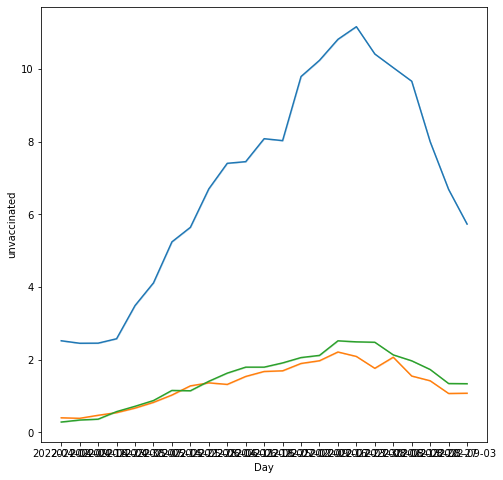

In [3]:
sns.lineplot(data=df, x="Day", y="unvaccinated", ci=0)
sns.lineplot(data=df, x="Day", y="fully_vaccinated", ci=0)
sns.lineplot(data=df, x="Day", y="one_booster", ci=0)

## Is there a significant difference in death rates between Fully Vaccinated people and Unvaccinated people?

#### Create Datasets

In [17]:
fv=df['fully_vaccinated']
uf=df['unvaccinated']

#### Explore Datasets

#核密度估计Kernel Density Estimation(KDE)概述
密度估计的问题
由给定样本集合求解随机变量的分布密度函数问题是概率统计学的基本问题之一。解决这一问题的方法包括参数估计和非参数估计。

参数估计
参数估计又可分为参数回归分析和参数判别分析。在参数回归分析中，人们假定数据分布符合某种特定的性态，如线性、可化线性或指数性态等，然后在目标函数族中寻找特定的解，即确定回归模型中的未知参数。在参数判别分析中，人们需要假定作为判别依据的、随机取值的数据样本在各个可能的类别中都服从特定的分布。经验和理论说明，参数模型的这种基本假定与实际的物理模型之间常常存在较大的差距，这些方法并非总能取得令人满意的结果。

[参数估计：最大似然估计MLE][参数估计：文本分析的参数估计方法]

非参数估计方法
由于上述缺陷，Rosenblatt和Parzen提出了非参数估计方法，即核密度估计方法。由于核密度估计方法不利用有关数据分布的先验知识，对数据分布不附加任何假定，是一种从数据样本本身出发研究数据分布特征的方法，因而，在统计学理论和应用领域均受到高度的重视。

核密度估计（kernel density estimation）是在概率论中用来估计未知的密度函数，属于非参数检验方法之一，由Rosenblatt (1955)和Emanuel Parzen(1962)提出，又名Parzen窗（Parzen window）。Ruppert和Cline基于数据集密度函数聚类算法提出修订的核密度估计方法。

核密度估计在估计边界区域的时候会出现边界效应。

https://blog.csdn.net/pipisorry/article/details/53635895

<AxesSubplot:xlabel='fully_vaccinated', ylabel='Count'>

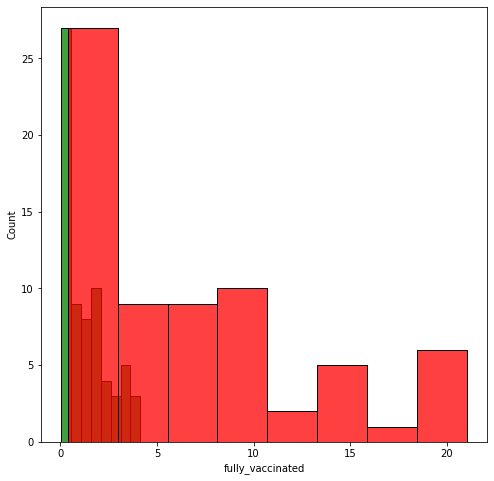

In [24]:
sns.histplot(fv,color="g")
sns.histplot(uf,color ='r')

<AxesSubplot:xlabel='fully_vaccinated', ylabel='Density'>

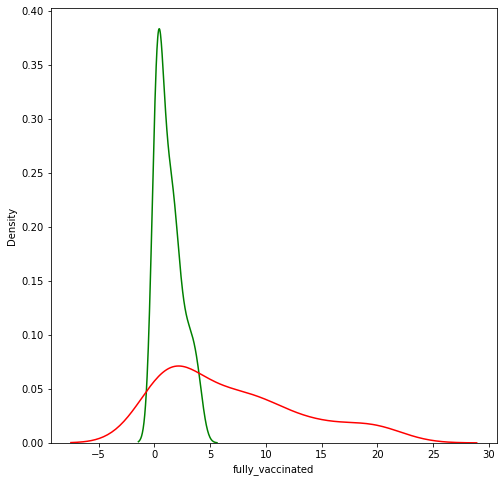

In [19]:
sns.kdeplot(fv,color="g")
sns.kdeplot(uf,color ='r')

In [22]:
fv.describe()


count    69.000000
mean      1.318059
std       1.148704
min       0.044441
25%       0.297390
50%       1.025216
75%       1.966681
max       4.136138
Name: fully_vaccinated, dtype: float64

In [23]:
uf.describe()

count    69.000000
mean      6.903453
std       6.116893
min       0.377413
25%       1.357448
50%       5.367513
75%      10.284717
max      21.037893
Name: unvaccinated, dtype: float64

### Hypothesis Test

First I'll try a regular t-test, then I'll do the non-parametric version, the Mann-Whitney. 

### 假设检验

首先，我将尝试常规 t 检验，然后我将进行非参数版本 Mann-Whitney。

1.t检验t检验是一种适合小样本数据的假设检验方法，通过比较不同数据的均值，研究两组数据之间是否存在差异。2. 结果怎么看解读t检验的结果，
首先判断p 值是否呈现出显著性,如果呈现出显著性,则说明两组数据具有显著性差异,具体的差异可通过平均值进行对比判断。
https://baike.baidu.com/item/P%E5%80%BC/7083622 

In [21]:
# t-test
ss.ttest_ind(fv, uf)

Ttest_indResult(statistic=-7.454552636718715, pvalue=9.50701441183468e-12)

定义
Mann-Whitney 秩和检验，也被称为 Mann-Whitney-U 检验，是另一类非参数检验方法，它们不对数据分布作特殊假设，因而能适用于更复杂的数据分布情况。

秩和检验的做法是，首先将两类样本混合在一起，对所有样本按照所考察的特征从小到大排序。在两类样本中分别计算所得排序序号之和T1 和T2 ，称作秩和。两类的样本数分别是n1个和n2。秩和检验的基本思想是，如果一类样本的秩和显著地比另一类小（或大），则两类样本在所考察的特征上有显著差异。秩和检验的统计量就是某一类（如第一类，秩和为T1）的秩和为了比较两类样本的秩和是否差异显著，需要比较T分布，当样本数目较大时，人们可以用正态分布来近似秩和T1 的分布。

In [25]:
# mw
ss.mannwhitneyu(fv, uf)

MannwhitneyuResult(statistic=845.0, pvalue=6.299258240567537e-11)

### Calculate Power

In [26]:
# Calculate inputs
ces = thinkstats2.CohenEffectSize(uf, fv)
alpha = .05
nobs = fv.count() + uf.count()

In [27]:
# calculate power
powerTest = TTestPower()
pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces

(1.0, 1.2691473231783308)

### Result

Looks like a statistically significant difference, by every metric. 

## Is There a Significant Difference in Death Rates Between Fully Vaccinated and Boosted Populations*

*The boosted population has two groups - those with one booster and those with two. The one booster group is larger than the two booster group - there are more people with only one booster than there are with two. Use the below ratio to generate a weighted average rate. I.e. if the ratio is .2, that means that 20% of the total boosted population has two doses and 80% have one dose. 

You'll have to calculate this weighted death rate, it should (probably - there's lots of potential ways you could do it) be a simple calculation that spits the result into a new column. 

In [8]:
two_dose_ratio = .2

#### Explore

#### Test

In [9]:
# t-test

# mw


#### Power

In [10]:
# Calculate inputs

# calculate power


#### How Large of a Sample is Needed for a Power of .8?

#### More Sophisticated Rates

We can improve the approximation of the number of people with two boosters vs one booster. For this part, try to consider the following, and put this into your data:
<ul>
<li> There is a starting rate of two booster people (similar to above - the proportion of boosted people with 2 boosters). Try this being <b>.1</b>
<li> There is a final rate of two booster people. Try with this being <b>.3</b>
<li> Each day, the ratio of people with boosters who have two increases a set amount, starting with the first value (.1) on day 1, and the last (.3) on the last day. 
</ul>

<b>Note:</b> This is more of a challenge of manipulating the data than of the hypothesis testing. Once the datasets are established, the process is the same as above. The function "np.arrange" may be useful here, but there's probably lots of ways to do it. 

In [11]:
# Plot Ratios
start = .1
cap = .3


In [12]:
# Add ratio to df


In [13]:
# Generate Weighted Boosted Rate

### Do Test

In [14]:
# t-test

# mw


#### Power

In [15]:
# Calculate inputs

# calculate power


## ANOVA

Is there a significant difference between any of the 3 vaccinated groups? Can you test it? 

In [16]:
#First, test for vars being equal-ish
